# Get data
```
mkdir -p /home/ubuntu/environment/long/20210104-fs711-longitudinal
cd /home/ubuntu/environment/long/20210104-fs711-longitudinal
aws s3 cp \
  --recursive \
  --exclude "*" \
  --include "*.stats" \
  s3://cmet-scratch/20210104-fs711-longitudinal .
aws s3 cp \
  s3://cmet-scratch/maclaren-cmeds/demographics.tsv \
  /home/ubuntu/environment/long/20210104-fs711-longitudinal/maclaren
aws s3 cp \
  s3://cmet-thinq/v1.0/datasets/validation/AccuracyNonCortical/demographics.tsv \
  /home/ubuntu/environment/long/20210104-fs711-longitudinal/AccuracyNonCortical
aws s3 cp \
  s3://cmet-thinq/v1.0/datasets/validation/AccuracyNonCortical/demographics.tsv \
  /home/ubuntu/environment/long/20210104-fs711-longitudinal/AccuracyNonCortical-defaced
```

In [2]:
import json
import os
import fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# imports find_json_files(); load_json_file(); load_dataset(); load_fs_dataset()
from cmeds import *

In [6]:
structs_of_interest = [
    'Left-Lateral-Ventricle',
    'Left-Hippocampus',
    'Left-Amygdala',
    'Left-Caudate',
    'Left-Putamen',
    'Right-Lateral-Ventricle',
    'Right-Hippocampus',
    'Right-Amygdala',
    'Right-Caudate',
    'Right-Putamen'
]

col_rename_defaced = {
    'Left-Lateral-Ventricle':'Left-Lateral-Ventricle-defaced',
    'Left-Hippocampus':'Left-Hippocampus-defaced',
    'Left-Amygdala':'Left-Amygdala-defaced',
    'Left-Caudate':'Left-Caudate-defaced',
    'Left-Putamen':'Left-Putamen-defaced',
    'Right-Lateral-Ventricle':'Right-Lateral-Ventricle-defaced',
    'Right-Hippocampus':'Right-Hippocampus-defaced',
    'Right-Amygdala':'Right-Amygdala-defaced',
    'Right-Caudate':'Right-Caudate-defaced',
    'Right-Putamen':'Right-Putamen-defaced'
}

demofile = '/home/ubuntu/environment/long/20210104-fs711-longitudinal/AccuracyNonCortical/demographics.tsv'
datadir = '/home/ubuntu/environment/long/20210104-fs711-longitudinal/AccuracyNonCortical'
accnoncort_fs711_samseg = load_fssamseg_dataset(datadir, demofile, structs_of_interest, drop_subjects=[])
accnoncort_fs711_aseg = load_fs_dataset(datadir, demofile, structs_of_interest, drop_subjects=[])

demofile = '/home/ubuntu/environment/long/20210104-fs711-longitudinal/AccuracyNonCortical-defaced/demographics.tsv'
datadir = '/home/ubuntu/environment/long/20210104-fs711-longitudinal/AccuracyNonCortical-defaced'
accnoncortdefaced_fs711_samseg = load_fssamseg_dataset(datadir, demofile, structs_of_interest, drop_subjects=[])
accnoncortdefaced_fs711_aseg = load_fs_dataset(datadir, demofile, structs_of_interest, drop_subjects=[])
#pd.concat([df1,df2.rename(columns={'b':'a'})], ignore_index=True)

Dropping the following subjects []
Dropping the following subjects []
Dropping the following subjects []
Dropping the following subjects []


In [29]:
accnoncort_fs711_samseg_face_vs_deface = pd.concat(
    [accnoncort_fs711_samseg, 
     accnoncortdefaced_fs711_samseg[structs_of_interest].rename(columns=col_rename_defaced)
    ],axis=1)

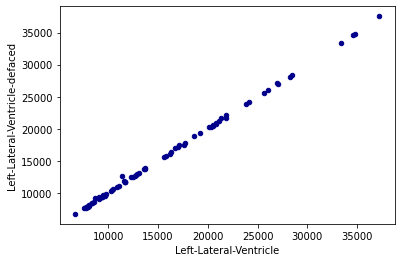

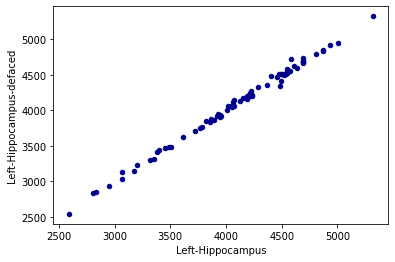

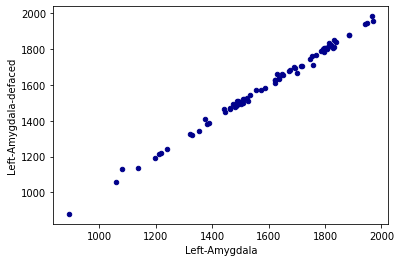

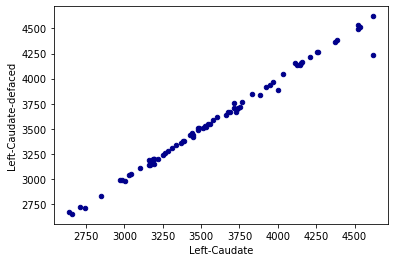

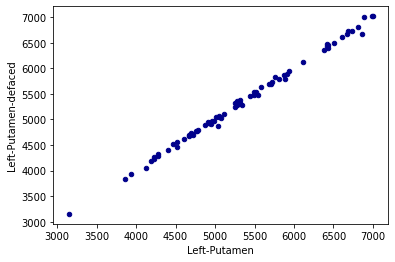

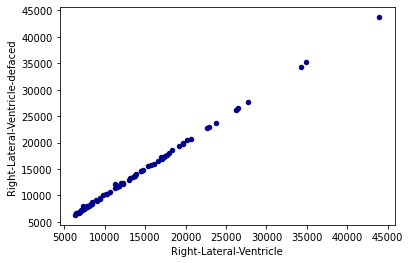

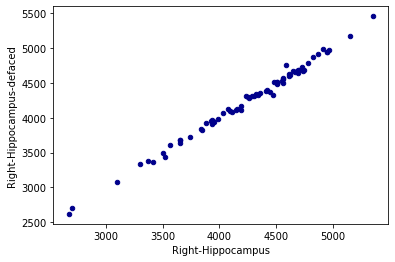

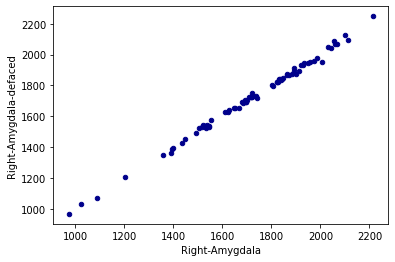

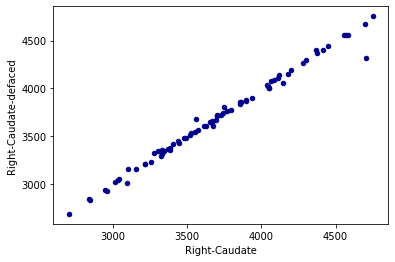

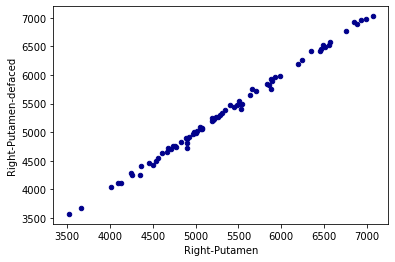

In [32]:
for struct in structs_of_interest:
    y_val = struct+'-defaced'
    ax1 = accnoncort_fs711_samseg_face_vs_deface.plot.scatter(x=struct,y=y_val,c='DarkBlue')